<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# LECTURE 8

In this class, we will formalize how we actualy make a scientific hypothesis and test it. 

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 8.0 Overview of Learning Objectives

In this lecture we will explore the following objectives:

- What is a hypothesis? 
- 

<br>
<!--end-block-->

## 8.1 What is a measurment? 

What is a measurement? lets say we perform a measurement of a parameter $x$. Now say there is a process $f(x)$ that process, what is the likelihood that measurement has occured? 

Lets say we have a measurement of some parameter $x$, and this meausurement behaves like a gaussian about some point with width $\sigma=1$. Lets write out this meausrement.  

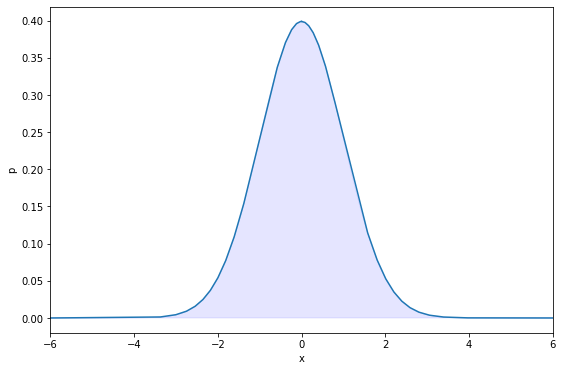

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotgaus():
    x,y=gaus(0,1)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()

plotgaus()

This preconceived distribution about how our measurement will behave is known as a prior. Now lets say we perform this measurement, but our observed measurement is not actually at the point we expect it to be. What if, for example our measurement is at $x=2$ what woud be the likelihood of this occuring or not occuring. 

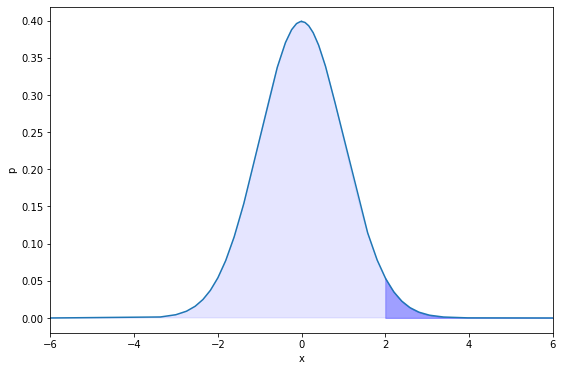

In [2]:
def gaus(mu=0,sigma=1,meas=2): 
    x = np.arange(-10, 10, 0.001)
    xmeas = np.arange(meas, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    ymeas = stats.norm.pdf(xmeas,mu,sigma)
    return x,y,xmeas,ymeas

def plotgaus():
    x,y,xmeas,ymeas=gaus(0,1,2)
    fig, ax = plt.subplots(figsize=(9,6))
    plt.style.use('fast')
    ax.plot(x,y)
    ax.fill_between(x,y,0, alpha=0.1, color='b')
    ax.fill_between(xmeas,ymeas,0, alpha=0.3, color='b')
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    plt.show()
plotgaus()

From the above, observed measurement. It is clear that this distribution has a large deviation from what we actually expected to observe. The key question here that we would like to understand: Is this a statistical fluctation, or is this something we did not expect?  

Understanding if this is something we do not expect is the focus of this lecture. Lets now imagine that we perform this measurement a number of time, say 10 times, and it all comes up away from our expectation. 

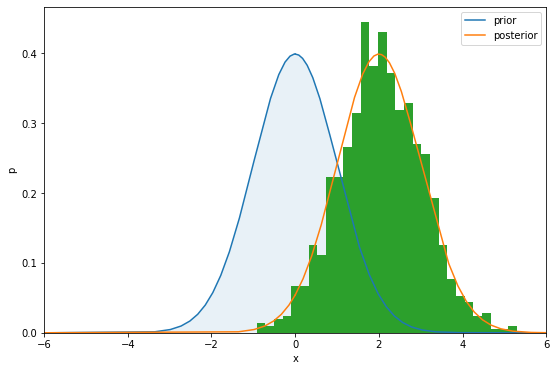

In [3]:
def gaus(mu=0,sigma=1): 
    x = np.arange(-10, 10, 0.001)
    y = stats.norm.pdf(x,mu,sigma)
    return x,y

def plotGausSample(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    xs,ys=gaus(0,1)
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

plotGausSample(2,1000)

Now we have two results, we have a prior (aka a guess) of what we though the data would look like and a posterior for what we actually observe the data. These two observations yield to two different ways to interpret the data. 

**Bayesian** It is possible to create a model of everything and within your model you can explain all random phenomena. As we take more data, we can fine tune our model to be ever more predictive. 

**Frequentist** The data guides our model. We can use what we observe in the data to explain how we will observe these phenomena in the future. 

### 8.2 Bayes Thereom

To understand Bayes theorem, lets define a bunch of terms, first we would like the define the probability of a hypothesis happening. We can write this probability as $P\left(\mathcal{H}\right)$, this is the probability of the hypothesis happening given a prior for how we expect the distribution to behave. To put a concrete label to this, lets consider that you are on a game show similar to the "Monty Hall" game show of the 1960s. You have 3 doors and there is a car behind one of the doors. The car is placed randomly, what is your original $P\left(\mathcal{H}\right)$?

\begin{eqnarray}
P(\mathcal{H}=\rm{door~1}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{door~3}) & = & \frac{1}{3} 
\end{eqnarray}

Now everything changes when you open one of the doors. In that instance your knowledge of what happens changes completely since you now have knowledge of what is behind which door. In the case of this, there are two results. The first result is that there is a car behind the door, great! In the second case, you know that the door that was opened is empty. So the question is what do you.  However, in the Monty Hall problem. Monty will mix things up by opening a door that does not have a car, and then asking you to stay with you original choice, or to switch. What do you do? 

Let's define $P\left(\mathcal{D}\right)$ as the probability of an instance of the data happening, and furthemore defining

\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{probability~of~a~hypothesis~given~data} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{probability~of~data~given~a~hypothesis} \\
\end{eqnarray}

Let's say you choose door 1, and Monty opens door two. We can write down the probability that Monty will open door~2
\begin{eqnarray}
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~1}) & = & \frac{1}{2} \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~2}) & = & 0 \\
P(\rm{open~2}|\mathcal{H}=\rm{car~at~door~3}) & = & 1 
\end{eqnarray}

If you chose correctly, the first time, then Monty has a 50% chance of choosing door 2 or 3, and both doors will not contain a car. If you did not choose correctly the first time, then Monty will for sure open a specific door, and in this scenario you know for sure that behind the other door that Monty did not choose is the car. So given this perspective do you switch or stay? Lets write out the probabilities again, remember when you start you have a $\frac{1}{3}$ chance of choosing correctly, and a $\frac{2}{3}$ chance of choosing incorrectly. 

\begin{eqnarray}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) & = & \frac{1}{3} \\
P(\mathcal{H}=\rm{car~at~door~2}|\mathcal{D}=\rm{open~2}) & = & 0 \\
P(\mathcal{H}=\rm{car~at~door~3}|\mathcal{D}=\rm{open~2}) & = & \frac{2}{3}  
\end{eqnarray}

or more generically we can write out:
\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{\rm{all~combinations}}
\end{equation}
or in other words

\begin{equation}
P(\mathcal{H}=\rm{car~at~door~1}|\mathcal{D}=\rm{open~2}) = \frac{P(\mathcal{D}=\rm{open~2}|\mathcal{H}=\rm{car~at~door~1})P(\mathcal{H}=\rm{door~1})}{P\left(\mathcal{D}=\rm{car~at~door~1}\right)+P\left(\mathcal{D}=\rm{car~at~door~2}\right)+P\left(\mathcal{D}=\rm{car~at~door~3}\right)}
\end{equation}

More generically, we can write this as what is known as Bayes theorem
\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})} 
\end{equation}

We can also relabel these terms as: 
\begin{eqnarray}
 P\left(\mathcal{H} | \mathcal{D} \right) & = & \rm{Posterior} \\
 P\left(\mathcal{D} | \mathcal{H} \right) & = & \rm{Likelihood} \\
 P\left(\mathcal{H} \right) & = & \rm{Prior} \\
 P\left(\mathcal{H} \right) & = & \rm{Normalizer(all~possibilities)} 
\end{eqnarray} 

The Posterior is our observed result, the Prior is our initial guess, the likelihood is what actually we observe, and finally the bottom term, the normalizer, is to ensure that our probabilities integrate to $1$ (aka, we have covered, and only covered, all possibilities).  As a general rule of thumb, the way to remember this is

\begin{equation}
 \rm{posterior} \propto \rm{likelihood} \times \rm{prior}
\end{equation}

Given Bayes theorem, lets go back to our original measurement. In that case, we had two normal distributions, a posterior about two, and a prior about zero. How do we connect these two? 

\begin{equation}
 P\left(\mathcal{H} | \mathcal{D} \right) =  \frac{P\left(\mathcal{D} | \mathcal{H} \right)P(\mathcal{H})}{P(\mathcal{D})} \\
\mathcal{N}(x,\mu=2,1) = \frac{P\left(\mathcal{D} | \mathcal{H} \right)}{P(\mathcal{D})}\mathcal{N}(x,\mu=0,1) \\
P\left(\mathcal{D} | \mathcal{H} \right) = \frac{\mathcal{N}(x,\mu=2,1)}{\mathcal{N}(x,\mu=0,1)} P(\mathcal{D}) 
\end{equation}

Since $P(\mathcal{D})$ is just a constant to ensure that our resulting probability is normalized, we can pretty easily compute the likelihood in our first example. Lets plot it. 


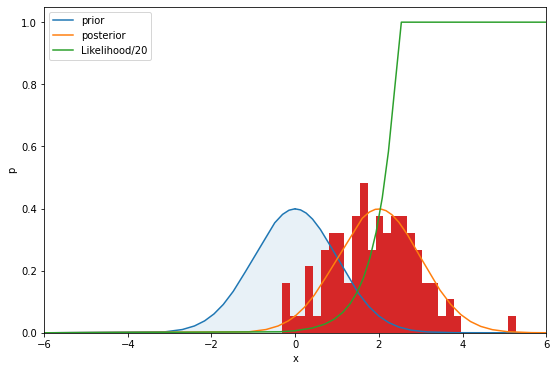

In [4]:
def plotGausSampleLike(iZ,iSample):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    xs,ys=gaus(0,1)
    yratio=np.minimum(0.05*y/ys,1.)
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()

plotGausSampleLike(2,100)

As you can see the likelihood shoots up, and in fact shoots up above 1, this means that our liklelihood is unphysical, and we are not capturing our physics, or more imporantly, this means that **our prior is wrong**. Whats the right prior in this scenario? 

Lets tweak our prior to have a large sigma $\mathcal{N}(\mu=0,\sigma=2)$

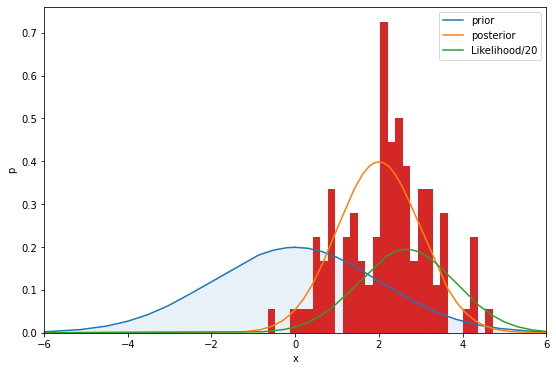

In [15]:
def plotGausSampleLike(iZ,iSample,iSigMax):
    plt.style.use('fast')
    fig, ax = plt.subplots(figsize=(9,6))
    samples = np.random.normal(iZ,1,iSample)
    x,y=gaus(iZ,1)
    xs,ys=gaus(0,iSigMax) #######<<<<< This is our tweak
    yratio=np.minimum(0.05*y/ys,20.)
    ax.plot(xs,ys,label='prior')
    ax.plot(x,y,label='posterior')
    ax.plot(x,yratio,label='Likelihood/20')
    count, bins, ignored = plt.hist(samples, 30, density=True)
    ax.fill_between(xs,ys,0, alpha=0.1)
    ax.set_xlim([-6,6])
    ax.set_xlabel('x')
    ax.set_ylabel('p')
    ax.legend()
    plt.show()
    return samples
    
samples=plotGausSampleLike(2,100,2)

What have we done?  Essentially, we had previously claimed that our measurement was at zero with uncertainty (expected $\sigma$=1). Now what we have done is made the claim that our uncertainty is way larger. What this has done is lowered our likelihood for something observed to happen to some number that is now not insanely large.  

### Challenge question: 

Consider that we have two gaussians one with mean of 0 and one with mean of 0.1, and both have width 1. In one experiment, we sample it 1000 samples, and in another we sample it 1,000,000 times. What is the max likelihood value of all the observed points? What would the case be if we sampled even more (10M...)? What does this mean about the distributions? 

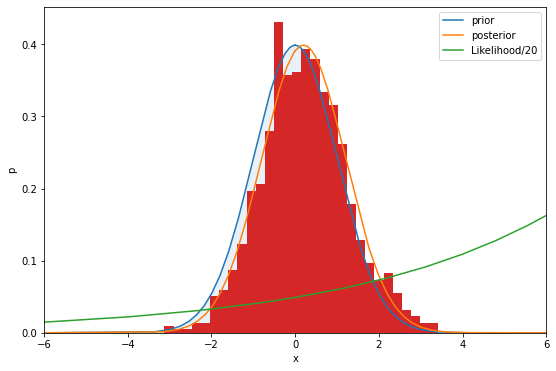

3.4209083866461447
Max: 1000  is  126.69932671357923


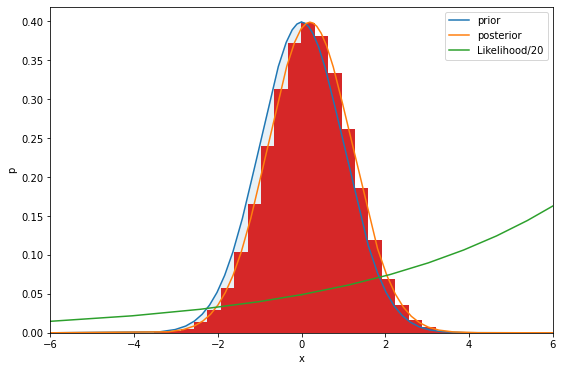

5.127019146052181
Max: 1000  is  3843.1141447114946


In [25]:
#solution
def maxlikelihood(isamples,mu1=2,sig1=1,mu2=0,sig2=1):
    val=np.max(isamples)
    print(val)
    like=stats.norm.pdf(val,mu1,sig1)/stats.norm.pdf(val,mu2,sig2)
    return like

def maxlike(iN):
    samples=plotGausSampleLike(0.2,iN,1)
    like=maxlikelihood(samples)
    print("Max:",n," is ",like)

maxlike(1000)
maxlike(1000000)

## 8.3 Bayesian vs Frequentists

Now, this interpretation all comes to a head when we start to think about how we wish to quote our results. If our priors are incorrect, and we continue to progressively take data, at some point our priors are going to be wrong. Dealing with how this is wrong depends on what sort of statistician you are.  Here is a diagram to explain. 

![diagram](../bayes_freq.png)

**Frequentist** If I see a data distribution, I can come up with a way to fit it. By getting a good fit, I can explain the next result. 

**Bayesian** I start with a model, by taking more and more measurements, I can improve my model. 

To try to capture these ideas, lets fit this guassian with two separate approaches. 

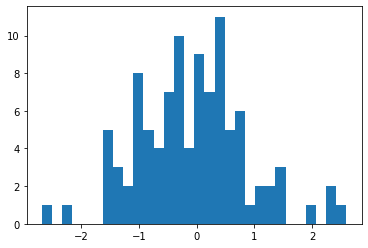

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 30
    # variables        = 3
    chi-square         = 21.7304031
    reduced chi-square = 0.80482974
    Akaike info crit   = -3.67455110
    Bayesian info crit = 0.52904104
[[Variables]]
    amplitude:  15.3658553 +/- 1.69212362 (11.01%) (init = 1)
    center:    -0.25763990 +/- 0.12872489 (49.96%) (init = 2)
    sigma:      1.02766098 +/- 0.13457109 (13.09%) (init = 1)
    fwhm:       2.41995663 +/- 0.31689070 (13.09%) == '2.3548200*sigma'
    height:     5.96508941 +/- 0.80767111 (13.54%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  =  0.379
    C(center, sigma)     = -0.230
    C(amplitude, center) = -0.175
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 30
    # variable

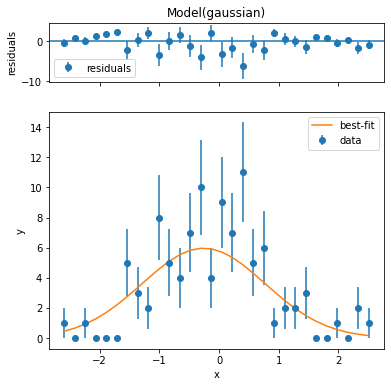

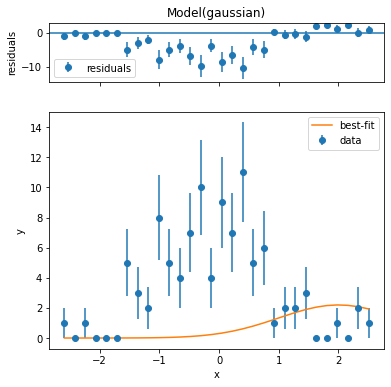

In [127]:
#with Bayesian, we hypothesize a guassian and fit it
from lmfit.models import GaussianModel
lN=100
samples = np.random.normal(0,1,lN)
count, bins, ignored = plt.hist(samples,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
weight=1./np.sqrt(count)
weight[weight==float('+inf')] = 0
plt.show()

def frequentist(iBins,iCount,weight):
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())
    
def bayesianBad(iBins,iCount,weight):
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    params['center'].vary=False
    params['sigma'].vary=False
    result = model.fit(iCount, params, x=iBins,weights=weight)
    result.plot()
    print(result.fit_report())

frequentist(binscenters,count,weight)
bayesianBad(binscenters,count,weight)

From above, what you see is that if we have a sample data, in the frequentist scenario, we just fit this distribution, and extract the parameters. In the frequentist approach, the data is key, and so if our $\chi^{2}$ is good for our fitted model, we can declare success. 

In the Bayesian approach, we need to reocncile our prior with our fitted data. If our prior is that our data should behave as a gaussian about two, and we try to fit it to the data, you see there is not a very good $\chi^{2}$ value, and the fit is clearly off. 

To reconcile our Bayesian fit, what we need to do is modify our model so that we can actually go from our prior to our fitted function. To do this, we need to insert a new prior. In this case, our prior will be that the mean of the Gaussian can vary. Let's write this down. 

\begin{eqnarray}
 P\left(\mathcal{H}=x\right|\mu,\sigma) & = & \mathcal{N}(x,\mu=2,\sigma=1) \\
 P\left(\mathcal{H}=\mu\right|\sigma) & = & \frac{1}{b-a}~\forall~\mu~\in~[a,b] \\ 
                               & = & 0~~~~~~~~~\forall~\mu~\notin~[a,b]
\end{eqnarray}
All that we are saying above is that mu can now vary between a and b. Lets now fit the data with this statement. To do this, we are going to use a new feature in `lmfit`. What we are aroing to do is call `lmfit.minimize` and feed it a modified loss, which we define as `resid` (aka the residual function).

Additionally, we will add another constraint and form to the fit. In particular, we will add a paramater $\Delta_{\mu}$, such that the loss and $\mu$ will be written as: 
\begin{eqnarray}
\mu_{\rm new} & = & \mu -\Delta_{\mu} \\
\mathcal{L}_{\rm new} & = & \mathcal{L} + 0~\forall~\mu~\in~[a,b] \\ 
                      & = & \mathcal{L} + \inf~\forall~\mu~\notin~[a,b] 
\end{eqnarray}
In this case, we will just approximate a really large number as infinity. 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 31
    # variables        = 2
    chi-square         = 21.7472849
    reduced chi-square = 0.74990638
    Akaike info crit   = -6.98944693
    Bayesian info crit = -4.12147252
[[Variables]]
    amplitude:  6.07676395 +/- 0.59741361 (9.83%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     2.42427818 +/- 0.23833356 (9.83%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    deltamu:    2.25158421 +/- 0.11722612 (5.21%) (init = 0)


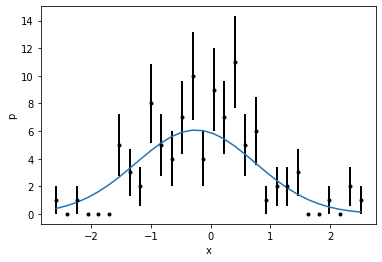

In [149]:
#here is our modified function
def gauss(x, amp, mu, sigma,dmu):
    return amp * np.exp(-(x-mu+dmu)**2 / (2.*sigma**2))

def resid(params, x, ydata,weights):
    mu    = params['center'].value
    sigma = params['sigma'].value
    amp   = params['amplitude'].value
    dmu   = params['deltamu'].value
    lossshift=0
    if abs(dmu) > 3:
        lossshift=1e32
    y_model= gauss(x,amp,mu,sigma,dmu)
    residarr = (y_model - ydata)*weights
    residarr = np.append(residarr,lossshift)
    return residarr
    
def bayesianGood(iBins,iCount,weights):
    model = GaussianModel()
    params = model.make_params(center=2, amplitude=1, sigma=1) 
    params['center'].vary=False
    params['sigma'].vary=False
    params.add("deltamu", value=0.0, min=-10, max=10) #Our new line of code
    result = lmfit.minimize(resid, params, args=(iBins, iCount,weights))
    lmfit.report_fit(result)
    #Now we plot it. 
    plt.errorbar(iBins, iCount,np.sqrt(iCount), lw=2,fmt=".k", capsize=0)
    plt.plot(binscenters,gauss(binscenters,result.params['amplitude'].value,result.params['center'].value,result.params['sigma'].value,result.params['deltamu'].value))
    plt.xlabel("x")
    plt.ylabel("p")
    plt.show()

bayesianGood(binscenters,count,weight)



### 8.4 Nuisance Parameters

Now we get a good fit! However, you might be annoyed, we have now added a parameter. This parameter is often referred to as a [nusiance parameter](https://en.wikipedia.org/wiki/Nuisance_parameter), since its a way to incorporate uncertainty of known parameters into the fit. In order to describe our known uncertainty we modified our loss so that once we are out of our parameter range the loss goes to infinity. This is rather unphysical way to modify our parameters. 

In practice, we tend to add parameters where we know somthing about it. What if for example, we have a different model for the behavior of $\mu$. For example, 

\begin{eqnarray}
 P\left(\mathcal{H}=\mu\right|\sigma) & = & \mathcal{N}(\mu,\mu=2,\sigma_{\mu}=0.15) \\                            
\end{eqnarray}

What this means is that $\mu$ can vary as a gaussian about $2$ with an uncertainty of $\sigma_{\mu}=0.15. What we can then do is again add a new parameter $\Delta_{\mu}$, however in this case, we need to modify the loss so that $\Delta_{\mu}$ can only vary as gaussian about 0 (its 0 b/c we are fixing $\mu$ to be 2, but floating $\Delta_{\mu}$. 

The modified loss can be written noting that loss is $-\log($Likelihood$)$, thus: 
\begin{equation}
 \log(P) = \log\left(\mathcal{N}(\Delta_{\mu},\mu=0,\sigma=1)\right)\\
 -\log(P) = -\log\left(\frac{1}{\sqrt{2\pi\sigma^{2}}} \exp\left(-\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right) \right) \\
 -\log(P) = -\log(C) + \left(\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right)
\end{equation}

Where $C$ is a constant that we don't care about when minimizing. As a consequence, we can write the modified loss as, and $\Delta_{\mu}$ definition as:

\begin{eqnarray}
\mu_{\rm new} & = & \mu -\Delta_{\mu} \\
\mathcal{L}_{\rm new} & = & \mathcal{L} + \left(\frac{\Delta_{\mu}^2}{2\sigma_{\mu}^{2}}\right)  
\end{eqnarray}

Now lets perform the fit, again and see how we do. Note, that ``lmfit`` when it computes resid, does not square the difference, it computes the signed residual, so we have to be careful to take that into account. 


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 31
    # variables        = 2
    chi-square         = 83.1016548
    reduced chi-square = 2.86557430
    Akaike info crit   = 34.5683997
    Bayesian info crit = 37.4363741
[[Variables]]
    amplitude:  1.89609510 +/- 0.75006366 (39.56%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     0.75643254 +/- 0.29923212 (39.56%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    deltamu:    0.17872709 +/- 0.23841497 (133.40%) (init = 0)


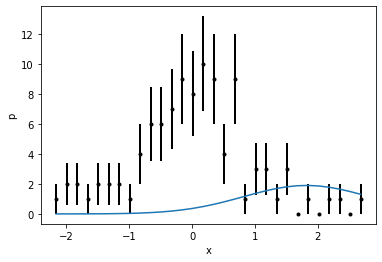

In [156]:
def resid(params, x, ydata,weights):
    mu    = params['center'].value
    sigma = params['sigma'].value
    amp   = params['amplitude'].value
    dmu   = params['deltamu'].value
    sigmamu=0.15
    lossshift=dmu/sigmamu
    y_model= gauss(x,amp,mu,sigma,dmu)
    residarr = (y_model - ydata)*weights
    residarr = np.append(residarr,lossshift)
    return residarr

bayesianGood(binscenters,count,weight)

So now the parameter $\Delta_{\mu}$ can move a little bit, but it doesn't really reconcile the fit. If the $\chi^{2}$ is bad then this is a sign that maybe your model is not great, or maybe your uncertainty on $\mu$ (aka $\sigma_{\mu}$) is just too small. 

Now, going back to our original statistical interpretation. Is this bayesian? or is it Frequentists? 

From the above it seems that such an approach is Bayesian. However, the nuisance is now used to profile the data, and yield a better more constrained posterior. So in some other sense we are using the data. In practice, we refer to this as a hybrid approach. Since we are building a Bayesian model, but relying on the data to really get a good fit. To understand this more, lets do a quick challenge question. 

### Challenge Question: 

Take the above distribtuion, which was for 100 events and run the fit now for 1000 events. What happens to the nuisance parameter, and the fit? 


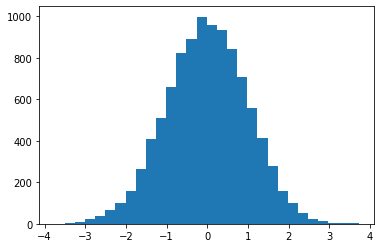

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 31
    # variables        = 2
    chi-square         = 205.986401
    reduced chi-square = 7.10297933
    Akaike info crit   = 62.7085113
    Bayesian info crit = 65.5764857
[[Variables]]
    amplitude:  992.163595 +/- 26.4803211 (2.67%) (init = 1)
    center:     2 (fixed)
    sigma:      1 (fixed)
    fwhm:       2.35482000 +/- 0.00000000 (0.00%) == '2.3548200*sigma'
    height:     395.816027 +/- 10.5641202 (2.67%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    deltamu:    2.00276268 +/- 0.02651836 (1.32%) (init = 0)


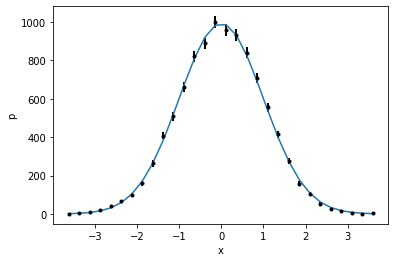

In [159]:
#solution
lN=10000
samples = np.random.normal(0,1,lN)
count, bins, ignored = plt.hist(samples,30)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
weight=1./np.sqrt(count)
weight[weight==float('+inf')] = 0
plt.show()

bayesianGood(binscenters,count,weight)
#The fit is now good.  
#The data now has a much stronger constraint than our nuisance, and as a consequence pulls it away from 2!

### 8.5 Hypothesis tests

Ok, so we have taken a bit of a foray into understanding Bayes theorem and building high level insights into how we build a fit model. In practice, when we build models there are times when we know how our parameters will vary, and there are times when we don't know our parameters. The ones we do, we end up as Bayesians, we try to put gaussian constraints on them. For the ones that we don't, we behave like frequentists, we try to put no constraints and then rely on our knowledge of the data to understand them. 

Even though there is no underlying model, there are many powerful ways to play data off of other data. In its most general form, we can ask are two distributions from the same underlying phenomena, or are they different. This question is often referred to as a "[hypothesis test](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)", since we aim to test the hypothesis of two distribtuions being the same.  

Lets imagine we have took two measurements of a parameter $x$: $p_{a}(x)$ and $p_{b}(x)$, and we have two hypotheses

**Null Hypothesis** the distributions are the same $p_{a}(x) = p_{b}(x)$. 

**Alternative Hypothesis** the distributions are different $p_{a}(x) \neq p_{b}(x)$ 

In this case, we would like to compute the probability ($p$) of either the **Null** being true or the **Alternative** ($1-p$). From this p-value we can translate this to a confidence interval that will gauge our likelihood to believe our hypothesis. 

There are many uses of a hypothesis test in physics, and beyond. To give you a few examples: 

**Is my data consistent?** Let's say you took some data, perhaps you measured some astrophysical phenonmenon twice, and you would like to determine that the measurement is the same in both instances, then you can perform a hypothesis test. 

**Can I detect an effect?** Famously, one of the great statistician's, Fisher, [constructed a hypothesis test to test a lady's claim that she could determine, just by taste, wether tea was prepared by pouring the tea into the milk vs pouring the milk into the tea](https://en.wikipedia.org/wiki/Lady_tasting_tea). We could imagine all sorts of effects in the data that we would like to test. 

**Did I Just make a discovery?** In the rest of the lecture, and next lecture, we are going to build up the fit that led to the discovery of the Higgs boson. We will evaluate the significance by making a hypothesis test. 

### 8.6 $\chi^{2}$ test

The most basic hypothesis test is to make two histograms, and compute the distribution bin by bin, by computing the $\chi^{2}$ metric between the two distributions.  To see this, lets again make two gaussian distributions, we will sample two distributions: 

\begin{equation}
 p_{a} (x) = \mathcal{N}(x,\mu=0,\sigma=1)\\
 p_{b} (x) = \mathcal{N}(x,\mu=0.2,\sigma=1)
\end{equation}

Let's sample each distribution 50 times. 


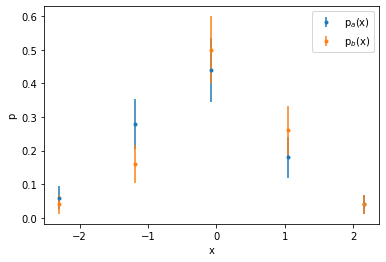

In [254]:
testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def plotHist(iSamples,iLabel,bin_edges=None):
    if bin_edges is None:
        y, bin_edges = np.histogram(iSamples, bins=5)
    else:
        y, bin_edges = np.histogram(iSamples, bins=bin_edges)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm=len(iSamples)
    plt.errorbar(bin_centers,y/norm,yerr=y**0.5/norm,fmt=".",label=iLabel)
    return bin_edges

bin_edges=plotHist(testSamplesA,"p$_{a}$(x)")
bin_edges=plotHist(testSamplesB,"p$_{b}$(x)",bin_edges)
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

We can define a $\chi^{2}$ compatability test by reminding ourselves that a $\chi^{2}$ is a sum of Gaussian distribtuions with width $1$. Let's image that we believe our first measurement is emblemeatic of a true distributions $p_{a}(x)$, and then we compare a new observation $\mathcal{O}_b$, which is our measured distributions from $p_{b}$, we can define a $\chi^{2}$ between the two as:

\begin{eqnarray}
\chi^{2}_{N_{bins}} & = & \sum_{i=1}^{N_{bins}} \left(\frac{\mathcal{O}_{b}(x_{i}) - p_{a}(x_{i}) }{\sigma_{i}}\right)^{2} 
\end{eqnarray}

For a first measurement of $N_{a}$ events and $N_{a}(x_{i})$ events for the $x_{i}^{th}$ bin, we can write $p_{a}(x)$ as:
\begin{equation}
 p_{a}(x_{i}) = \frac{1}{N_{a}}\left(N_{a}(x_{i})\right)
\end{equation}

Consequently the uncertainty in each bin is
\begin{eqnarray}
\sigma_i&=&\sqrt{\sigma^2_a(x_{i})+\sigma^2_{b}(x_{i})}\\
\sigma_i&=&\sqrt{\frac{1}{N^{2}_{a}} N_{a}(x_{i})+\frac{1}{N^{2}_{b}} N_{b}x_{i}))}\\
\sigma_i&=&\sqrt{\frac{p_{a}(x_{i})}{N_{a}}+\frac{p_{a}(x_{i})}{N_{b}}}
\end{eqnarray}
we can write the above $\chi^{2}$ test as

\begin{eqnarray}
\chi^{2}_{N_{bins}} & = & \sum_{i=1}^{N_{bins}} \frac{\left(p_{b}(x_{i}) - p_{a}(x_{i})\right)^{2}  }{\frac{p_{a}(x_{i})}{N_{a}} + \frac{p_{b}(x_{i})}{N_{b}} } \\
& \approx & N_{b} \sum_{i=1}^{N_{bins}} \frac{\left(p_{b}(x_{i}) - p_{a}(x_{i})\right)^{2}  }{p_{b}(x_{i})}\\
                    & = & N_{b} \sum_{i=1}^{N_{bins}} \frac{\left(\frac{N_{b}(x_{i})}{N_{b}} - p_{a}(x_{i})\right)^{2}  }{p_{b}(x_{i})}
\end{eqnarray}

Since this is a $\chi^{2}$ distribution, we can immediately determine the significance by translating the $\chi^{2}$ value to a p-value. Let's code this up! One thing to note is that this test doesn't depend on the sampling in $b$, so it has its limitations. Oftentimes, we use this when $N_{a} \gg N_{b}$, this is the reason for the approximation in the above form.


0.4744544429760561


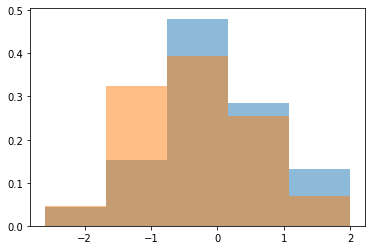

In [255]:
def chi2test(iSampleB,iSampleA,nbins=5):
    countA, binsA, ignored = plt.hist(iSampleA, nbins,      density=True ,alpha=0.5,label='a')
    countB, binsB, ignored = plt.hist(iSampleB, bins=binsA, density=True,alpha=0.5,label='b')
    #plt.legend()
    #plt.xlabel("x")
    #plt.ylabel("p")
    chi2=0
    ndof=0
    for i0 in range(len(binsA)-1):
        if countB[i0] > 0 and countA[i0] > 0:
            unc2 = countA[i0]/len(iSampleA) +  countB[i0]/len(iSampleB)
            chi2+=(countB[i0]-countA[i0])**2/unc2
            ndof=ndof+1
    p=1-stats.chi2.cdf(chi2, ndof)
    return p
print(chi2test(testSamplesA,testSamplesB))

So,as you can see our data deviations by a fairly large p-value. Let's take a look at how this varies over the number of events for 3 different distributions, one with $\mu=0.2$, one with $\mu=1$ and $\mu=2$ going from a sample of $0$ to $50$ events, and comparing to a true distribution of 100k events. 

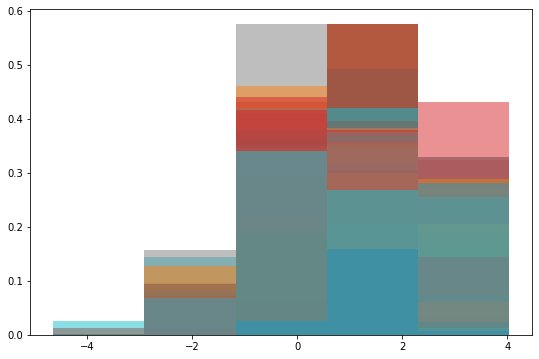

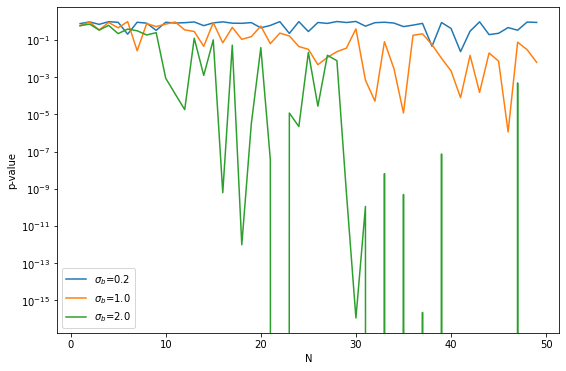

In [237]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
samples = np.random.normal(0,1, 100000)

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = chi2test(testsamples1,samples)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = chi2test(testsamples2,samples)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = chi2test(testsamples3,samples)
    pvalues3.append(pvalue)
    xvals.append(i0)
count1, bins1, ignored = plt.hist(samples, 5, density=True,alpha=0.5)
plt.show()
    
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label='$\sigma_{b}$=0.2')
ax.plot(xvals,pvalues2,label='$\sigma_{b}$=1.0')
ax.plot(xvals,pvalues3,label='$\sigma_{b}$=2.0')
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
ax.legend()
plt.show()


So you can see that for 50 events, its hard to distinguish the small $\sigma$. However for a 2 $\sigma$, we can pretty clearly separate them with with more than 10 events. The above is fluctuating a lot b/c it is just one scan. In principle, to get a trend line, we would have to run the above plot many times and then average over the many plots to get a nice trend line. 

### Challenging Challenge question (after class)

Compute the trend line above the above distribution by running the above plot 50 times and taking the average p-value. This may take a while. 

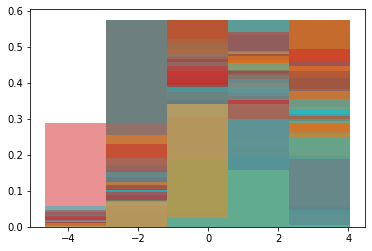

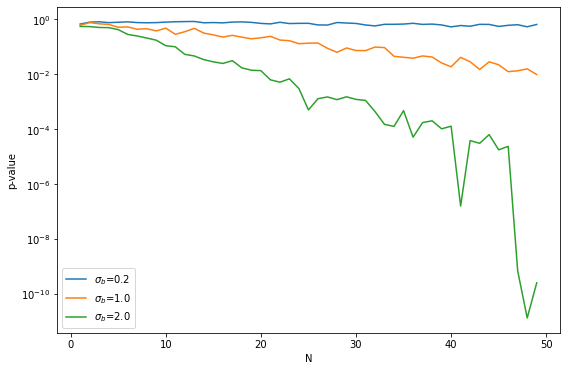

In [244]:
#solution
def scan(iN,iNToys=30): 
    spvalues1=np.array([])
    spvalues2=np.array([])
    spvalues3=np.array([])
    for i0 in range(iNToys):
        testsamples1 = np.random.normal(0.2,1,iN)
        pvalue = chi2test(testsamples1,samples)
        spvalues1 = np.append(spvalues1,pvalue)
        
        testsamples2 = np.random.normal(1,1, iN)
        pvalue = chi2test(testsamples2,samples)
        spvalues2 = np.append(spvalues2,pvalue)
        
        testsamples3 = np.random.normal(2,1, iN)
        pvalue = chi2test(testsamples3,samples)
        spvalues3 = np.append(spvalues3,pvalue)
    return spvalues1.mean(),spvalues2.mean(),spvalues3.mean()
        
xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    xvals.append(i0)
    tmppvalue1,tmppvalue2,tmppvalue3=scan(i0)
    pvalues1.append(tmppvalue1)
    pvalues2.append(tmppvalue2)
    pvalues3.append(tmppvalue3)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label='$\sigma_{b}$=0.2')
ax.plot(xvals,pvalues2,label='$\sigma_{b}$=1.0')
ax.plot(xvals,pvalues3,label='$\sigma_{b}$=2.0')
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
ax.legend()
plt.show()

## 8.7 Maximum Likelihood

Lets say we have a sample that is Gaussian distributed, and we want to find the maximum likelhiood value of the mean and the resolution of this sample. 

For this sample, we can write, the likelhiood and log likelihood as:  

\begin{equation}
\mathcal{L}(x|\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}}
\end{equation}

To get get maximum value of $\mu$ we can write: 

\begin{eqnarray}
\frac{\partial}{\partial \mu}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \mu} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0\\
& = &  \left( \sum_{i=0}^{N} \frac{(x_{i}-\mu)}{\sigma^{2}} \right)  = 0\\
\sum_{i=0}^{N} (x_{i}-\hat{\mu}) & = & 0 \\
\sum_{i=0}^{N} x_{i} - N \hat{\mu} & = & 0 \\
\end{eqnarray}

This gives us a best fit for $\mu$, given by $\hat{\mu}$ of
\begin{eqnarray}
\hat{\mu} & = & \frac{1}{N} \sum_{i=0}^{N} x_{i}
\end{eqnarray}

Now for $\sigma^{2}$, we can do the same thing, and we get (for a best fit $\hat{\sigma}^{2}$:  

\begin{eqnarray}
\frac{\partial}{\partial \sigma^{2}}\log\left(\mathcal{L}(x|\mu_{i},\sigma_{i}) \right) & = & \frac{\partial}{\partial \sigma^{2}} \left( -\frac{n}{2} \log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\sigma^{2}} \right)  = 0 \\
& = & \left( -\frac{n}{2\hat{\sigma}^{2}} +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{2\hat{\sigma}^{4}} \right) \\
0 & = & \left( -n +  \sum_{i=0}^{N} \frac{(x_{i}-\mu)^2}{\hat{\sigma}^{2}}\right) \\
\hat{\sigma}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu)^2  
\end{eqnarray}
 
Now none of this is a big surprise, the best fit for the mean and variance of a gaussian distribution is the mean and variance. However, this process shows you the thought process that is undergone when trying to construt a maximum likelihood estimator of a sample. 


## 8.8 Likelihood Ratio

The most powerful way to compare two distributions is to compute the likelihood of each, and then take their ratio. By taking the $\log$ of this ratio, we end up with a robust way to define a hypothesis test. 
We define this as 
\begin{eqnarray}
\lambda & = & -2 \log\left(\frac{\mathcal{L_{\rm null}}}{\mathcal{L_{\rm alternative}}}\right) \\
        & = & -2 \log\left(\mathcal{L_{\rm null}}\right) - \log\left(\mathcal{L_{\rm alternative}}\right)  
\end{eqnarray}

Recall that the likelihood is just the probability of a specific thing happening. The likelihood ratio is just the ratio of the maximum probabilities of two hypotheses. Lets do an analytic example to start with. Imagine you have a set of points $x_{i}$, and you want to test the hypothesis that this sample has mean $\mu_{0}$ vs the alternative hypothesis that the mean is $\neq \mu_{0}$. Lets write out the likelihood for both scenarios. 

**Hypothesis $\mu_{0}$**

The likelihood is just written following the form below as: 
\begin{equation}
\mathcal{L}(\mu_{i}|x_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}
\end{equation}

Now, since we are maximizing all of our parameters except for $\mu$. The parameter $\sigma$ will be maximized to be the optimized value of $\sigma$, we denote $\hat{\sigma}$.

\begin{eqnarray}
\hat{\sigma}_{\mu}^{2} & = & \frac{1}{n} \sum_{i=0}^{N}(x_{i}-\mu_{0})^2  
\end{eqnarray}

which means, we can write 
\begin{equation}
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right)
\end{equation}

Finally, one more relation that is useful is that if $\mu_{0}\neq\bar{x}$, we can write this as 

\begin{eqnarray}
\hat{\sigma}^{2} & = & \frac{1}{n} \sum_{i=0}^{N} \left(x_{i} - \bar{x} + \bar{x}-\mu_{0}\right)^{2} \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2} + 2(x_{i} - \bar{x})(\bar{x}-\mu_{0})\right) \\ 
                 & = & \frac{1}{n} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2}\right) \\
                 & = & \hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}
\end{eqnarray}


**Alternative Hypothesis $\mu\neq\mu_{0}$**

In this scenario, we want to compute the maximum likelihood over *all parameters*, above we fixed $\mu$. This we can write, noting $\hat{\mu}_{max}=\bar{x}$.

\begin{equation}
\mathcal{L}(\mu_{i}\neq\mu_{0}|x_{i},\mu_{i},\sigma_{i}) = \left(\frac{1}{\sqrt{2\pi\hat{\sigma}^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\log\left(2\pi\hat{\sigma}^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}} \\
\log\left(\mathcal{L}(x|\mu_{0},\hat{\sigma}_{i}) \right) =  -\frac{n}{2}\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right)
\end{equation}

The log likelihood ratio for these is 

\begin{eqnarray}
\lambda & = & -n\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right) + n\left(\log\left(2\pi\hat{\sigma}_{\mu}^{2}\right) + 1\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2}_{\mu}}{\hat{\sigma}^{2}}\right) \\
        & = & n \log\left(\frac{\hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & = & n \log\left(1+ \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & \approx & n \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^2} 
\end{eqnarray}
Where in the last step, we taylor expanded for small $|\mu_{0}-\bar{x}|$. Incidently, if we had done a $\chi^{2}$ test we would converge on the same thing:
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{\hat{\sigma}^{2}} - \frac{(x_{i}-\bar{x})^2}{\hat{\sigma}^{2}} \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(x_{i}-\mu_{0}\right)^2 - \left(x_{i}-\bar{x}\right)^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} x^{2}_{i} - x^{2}_{i} - 2 x_{i}\left(\mu_{0}-\bar{x}\right) - \mu_{0}^2 -\bar{x}^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(\mu_{0}-\bar{x}\right)^{2} \\
        & = & \frac{n}{\hat{\sigma}^2} \left(\mu_{0}-\bar{x}\right)^{2}
\end{eqnarray}

For both cases, what we see is that in this scenario, we have that our likelihood ratio is exactly equivalent to a gaussian distribution about $\mu=\bar{x}$, with a variance given by $\hat{\sigma}^2/n$. 

Imagine now we had this for a few bins with mean in each of them given by $\bar{x}_{i}$, if we considered a few different samples (for example bins in a histogram), we can write: 
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N_{\rm bins}} \frac{n_{i}}{\hat{\sigma}_{i}^2} \left(\mu_{i}-\bar{x}_{i}\right)^{2}
\end{eqnarray}

This is very similar to a $\chi^{2}$ test. To see that lets write out this ratio a distribution where each bin has a value $\mu_{i}$ with uncertainty $\sigma_{i}$.  More generally, this is a sum of gaussian variables $\mu_{i}$, which means that the variation of the log likelihood is going to follow a $\chi_{\nu}$ distribution with $\nu=N_{\rm bins}$ as the number of degrees of freedom. 

### Wilk's theorem
This yields Wilk's theorem again, which says that the likelihood ratio $\lambda\rightarrow\chi_{\nu}$ in the limit of $n\rightarrow\infty$. 

Let's show Wilk's theorem

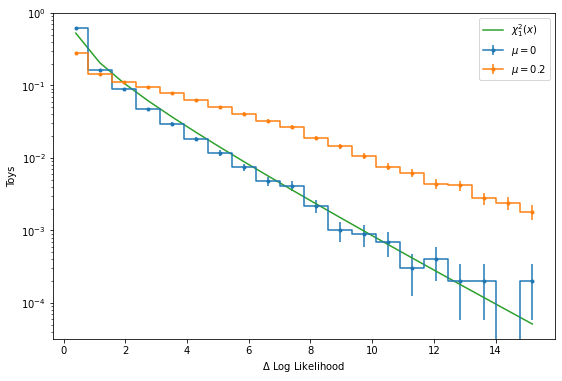

In [265]:
#Now lets run a simulation to see if Wilk's theorem is true
#Lets define the log likelihood is the simplest way possible (assume we don't know math)
#note we will use -1 to compute these on the fly
def loglikelihoodGaus(isample,mu0=-1,sigma0=-1):
    n=len(isample)
    if mu0 == -1:
        mu0=isample.mean()
    if sigma0 == -1:
        sigmahat2=(isample-mu0)**2/len(isample)
        sigmahat2=sum(sigmahat2)
    val=-n/2*(np.log(2*np.pi*sigmahat2)+1)
    return val

def sampleGaus(iMean,iNToy=10000):
    ntoys=iNToy
    deltaLL=[]
    for i0 in range(ntoys):
        testsamples1 = np.random.normal(iMean,1, 50)
        hypoth=loglikelihoodGaus(testsamples1,0) #compute with a fixed mean of 0
        null  =loglikelihoodGaus(testsamples1) #compute with mean floating
        val=hypoth-null
        deltaLL.append(-2*val)
    return deltaLL

deltaLL1 = sampleGaus(0)
deltaLL2 = sampleGaus(0.2)
    
y1, bin_edges = np.histogram(deltaLL1, bins=20)
y2, bin_edges = np.histogram(deltaLL2, bins=bin_edges)

#Now plot a chi2 with 1 dof
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
chi2 = []
for x in bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 1)
    chi2.append(chi2val)

#And Draw
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/len(deltaLL1),yerr=y1**0.5/len(deltaLL1),marker='.',drawstyle = 'steps-mid',label='$\mu=0$')
plt.errorbar(bin_centers,y2/len(deltaLL2),yerr=y2**0.5/len(deltaLL2),marker='.',drawstyle = 'steps-mid',label='$\mu=0.2$')
plt.plot(bin_centers,chi2,label='$\chi^{2}_{1}(x)$')
plt.xlabel("$\Delta$ Log Likelihood")
plt.ylabel("Toys")
ax.set_yscale('log')
plt.legend()
plt.show()


Now lets consider doing our test with a more realistic example. What if we want to quote the significance of an excess on top of data. Lets take a look at what this would look like. Lets make some toy datat with an excess on top of it. 

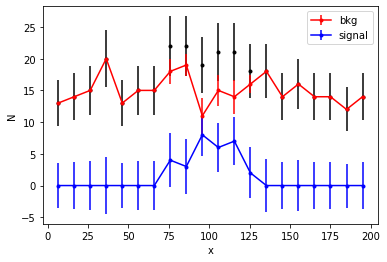

In [411]:
#First lets make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,30)
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
plt.xlabel("x")
plt.ylabel("N")
plt.legend()
plt.show()

Let's try to fitting our bump distribution. For this, we can define the two fit functions:

**Null hypothesis** Our fit function is just a flat constant with a gaussian signal on top.
\begin{equation}
f(x|C,\mu\,\sigma) = C + \mathcal{N}(x,\mu,\sigma)
\end{equation}

**Alternative hypothesis** Our fit function is just a flat constant
\begin{equation}
f(x|C) = C 
\end{equation}

For each of these we can define the likelihood by summing over our $N$ bins with value $x_{i}$ and number of events $y_{i}$ and treating each bin as a separate gaussian with uncertainty given by the $\sigma_{i}=\sqrt{y_{i}}$. We can write this as

\begin{eqnarray}
 \mathcal{L}(\theta_{i} | x_{i},y_{i}) & = & \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma_{i}^{2}}}\exp\left(-\sum_{i=0}^{N} \frac{(y_{i}-f(x_{i})^2}{2\sigma_{i}^{2}}\right) \\
 \log\left(\mathcal{L}(\theta_{i} | x_{i},y_{i})\right) & = &  -\sum_{i=0}^{n}\log\left(2\pi\sigma_{i}^{2}\right) - \sum_{i=0}^{N} \frac{(y_{i}-f(x_{i}|\theta_{i}))^2}{2\sigma_{i}^{2}}
\end{eqnarray}

Our liklihood ratio is then just the difference where we replace $f(x)$ with the appropriate hypothesis. Lets write this all out in lmfit and do it. 


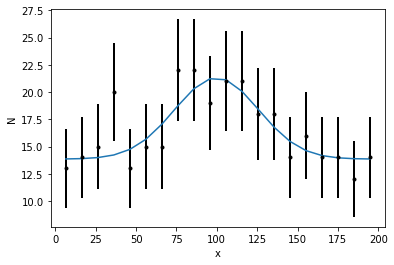

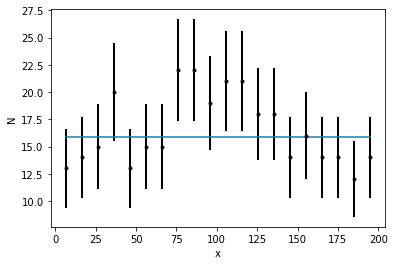

Delta negative Log Likelihood: 7.7921545268237935


In [426]:
from scipy.stats import norm

def fNull(params,x):
    val = norm.pdf(x,params["mu"],params["sigma"])
    return params["amp"]*val + params["c"]

def fAlt(params,x):
    return params["c"]*(x+1)/(x+1) #hack to output array

def binnedLikelihood(params, x, ydata, weights, func):
    y_model= func(params,x)
    residarr = np.sqrt(((y_model - ydata)/weights)**2 + 2*np.log(2*np.pi*weights**2))
    return residarr

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it. 
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull)

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)

Ok, so we got a big delta log likelihood. However, what is the significance of this? 

Well, this is where we can invoke Wilks' therorem. $\Delta \log(\mathcal{L})$ will be $\chi^{2}$ distributed if the null and alternative hypothesed are the same. In this case, the $\chi^{2}$ distribution will be with $n_{\rm params~Null}-n_{\rm params~Alt}$ degrees of freedom. For this case its $3$ (ie the 3 gaussian parameters. 

To see what this would look like if we just fit background, lets run the above computation for 1000 toys of just background data. 

Toy: 0  of  500
Toy: 50  of  500
Toy: 100  of  500
Toy: 150  of  500
Toy: 200  of  500
Toy: 250  of  500
Toy: 300  of  500
Toy: 350  of  500
Toy: 400  of  500
Toy: 450  of  500
Significance with 3 floating 0.9494916584393371


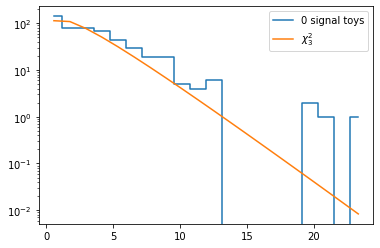

In [428]:
def toyNLL(iNEvents,iNToys,iBin_Edges):
    deltaNLLArr=np.array([])
    for i0 in range(iNToys):
        if i0 % 50 == 0:
            print("Toy:",i0," of ",iNToys)
        bkg = np.random.uniform(0,200, iNEvents)
        y, bin_edges = np.histogram(bkg, bins=iBin_Edges)
        x = 0.5*(bin_edges[1:] + bin_edges[:-1])
        nll = deltaNLL(x,y)
        deltaNLLArr=np.append(deltaNLLArr,nll)
    return deltaNLLArr

NLL1 = toyNLL(300,500,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 3)*len(NLL1) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{3}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 3 floating",stats.chi2.cdf(NLL,3))
plt.legend()
plt.yscale('log')
plt.show()

### challenge question

Run the fit toys for the above distribution, fixing the mass of the gaussian in the fit. What $\chi^{2}$ distribution is run? 

Toy: 0  of  100
Toy: 50  of  100
Significance with 3 floating 0.0


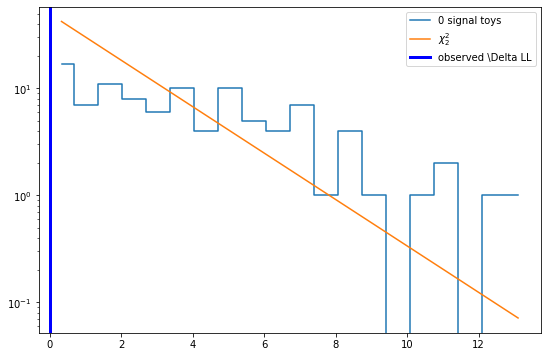

In [430]:
#answer
def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params['mu'].vary = True    ###############!!!! this is what we fix
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    return result.residual

NLL = deltaNLL(x,y,True)
NLL1 = toyNLL(300,100,bin_edges)
ll1, ll_bin_edges = np.histogram(NLL1, bins=20)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 2)*len(NLL1) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='0 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{2}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed \Delta LL")
print("Significance with 3 floating",stats.chi2.cdf(NLL,2))
plt.legend()
plt.yscale('log')


## 8.7 t-test

Now, just a fun aside. In addtiion to the $\chi^{2}$ test there is an another hypothesis test that was created known as the t-test. The origin of the t-test is that Guiness beer brewers were looking to compare beers from different sets of barely to see if they had a similar flavor. The issue was that they only had a few batches of barely, and a few batches of beer to compare distributions, in the limit of small number, we cannot assume distributions are gaussian, and, as a consequence, we cannot use the $\chi^{2}$ test. In light of this, the ["Student t-test"](https://en.wikipedia.org/wiki/Student%27s_t-test) was invented by William Gossett. Its called student t-test because Gossett published his paper as "student" to avoid Guiness regulations. 

The t-test, says that for $N$ samples $x_{1},...,x_{n}$ each from an underlying Guassian distribution with mean $\mu$ and variance $\sigma^{2}$, we can define the following measured mean ($\bar{x}$) and variance($s^{2}$): 
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i} x_{i} \\
s^{2}   = \frac{1}{N-1}\sum_{i} \left(x_{i}-\bar{x}\right)^{2}\\
\end{equation}
And the distribution of the mean and variance combined defined as the t-statistic
\begin{equation}
t = \frac{\bar{x}-\mu}{S/\sqrt{N}}
\end{equation}
will follow a $t$ distriubtion of $\nu=N-1$ degrees of freedom, given by by
\begin{equation}
 t(x) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{equation}

The t-distribution is a low-stats combination of binomial distributions. In practice, this gives us another way to test if two distributions are equal. This one avoids using histograms. Let's see how it behaves. Lets run a t-test to see how far our distributions are from $\mu=0$

/Users/pharris/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/pharris/Library/Python/3.7/lib/python/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


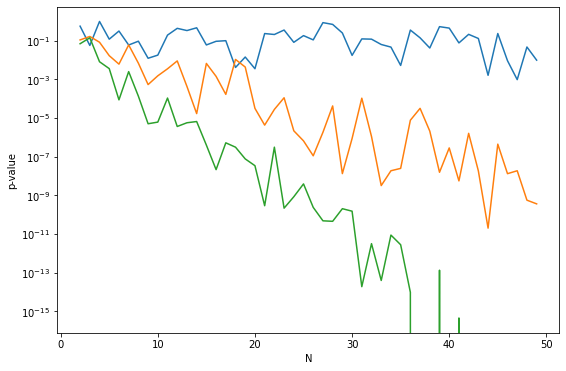

In [248]:
#now lets test the consistency of that our observation is consistent
def ttest(isamples,iMu=0):
    t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
    p = 1 - stats.t.cdf(t,df=len(isamples)-1)
    return p

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = ttest(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = ttest(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = ttest(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label="\mu=0.2")
ax.plot(xvals,pvalues2,label="\mu=1.0")
ax.plot(xvals,pvalues3,label="\mu=2.0")
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.show()

As you can see this is a bit easier to compute, and in general its more sensitive. This is allows us to take into account the full set of distributions. 

For completeness, the general form to compare two distribution, the modified t-statistic becomes: 

\begin{equation}
t = \frac{\bar{x}_{a}-\bar{x}_{b}}{s\left(\frac{1}{N_{a}} + \frac{1}{N_{b}} \right)} \\
s = \sqrt{\frac{(N_{a}-1)s_{a}^2 + (N_{b}-1)s_{b}^2 }{N_{a}+N_{b}-2} }
\end{equation}

Where $s_{a}^2$ is the variance of $x_{a}$ and $\bar{x}_{a}$ is its mean, and the same goes for $b$. This distribution becomes most useful, when we only have a few events.

This again follows a $t$ distribution with number of degrees of freedom given by $\nu=N_{a}+N_{b}-2$. Note that if the variances are large between the two distributions, this statistic breaks down. See [here](https://en.wikipedia.org/wiki/Student%27s_t-test) for more details.

### Challenge 

Compute the t-statistic p-value for two gaussian distributions of different means with 50 events?
Why is it so much more powerful than the $\chi^{2}$ statistic? 

In [256]:
#solution
def ttest_comp(iSamplesA,iSamplesB):
    s2 = (len(iSamplesA)-1)*iSamplesA.std()**2 + (len(iSamplesB)-1)*iSamplesB.std()**2
    s2 = s2/(len(iSamplesA)+ len(iSamplesB) - 2)
    s  = np.sqrt(s2)*(1/len(iSamplesA) + 1/len(iSamplesB))
    t  = (iSamplesA.mean()-iSamplesB.mean())/s
    p  = stats.t.cdf(t,df=len(iSamplesA)+len(iSamplesB)-2)
    return p
print(ttest_comp(testSamplesA,testSamplesB))
#its more powerful, because the chi2 distribution assuems binning. Consider doing the chi2 statistic with many bins

3.852970961006179e-09


## 8.8 f-test (Chow-test)

In the interest of generalizing the t-test, the statistician Ronald Fisher developed the [f-test](https://en.wikipedia.org/wiki/F-test). This is really a generalization of t-test. This has become very useful in physics due to the work of Gregory Chow at MIT in the late 1950s. At that time, he developed the Chow test aimed at trying to come up with a way for how well a fit is behaving. To undersand the chow-test lets delve into the the f-test. 

The f-test is used when you want to compare a few distributions with each other. Imagine for example you have $N$ groups of data, each with $m$ points. If these samples are all from a Gaussian distribution of mean $\mu$ and variance $\sigma^{2}$, ie $\mathcal{N}(x,\mu,\sigma)$. Then we can define a new statistic defined conceptually as 
\begin{equation}
 f = \frac{\rm variance~across~samples}{\rm variance~within~each~sample}  
\end{equation}
which should be close to 1 if the samples are all from the same underlying distribution, but it should not be 1 if the samples are from different distributions. 

The analytic definition of $f$ is given by considering each of the K-groups $x_{j}$ with mean given by $\bar{x}_{j}$ and variance $s_{j}^{2}$. The mean and sigma over all $n-groups$ we can define as $\bar{x}$ and $\sigma^{2}$. Lets say we have two distributions $a$ and $b$ each with number of degrees of freedom given by $n_{a}$ and $n_{b}$, we can then write the f-distribution as the ratioo of their variances: 
\begin{equation}
 f = \frac{\frac{S^{2}_{a}}{n_{a}} }{ \frac{S^{2}_{b}}{n_{b}} }\\
\end{equation}

More generally, we can write the f-statistic as the variance of distince samples over the average variance over the individual samples. For a total amount of $N$ samples with $K$ groups, each with $n_{i}$ events within, we can write the f-statistic as
\begin{equation}
 \sigma^{2}_{\rm group} = \frac{1}{K-1}\sum_{i=1}^{K} n_{i} \left(\bar{x}_{i}-\bar{x}\right)^2 \\
 \sigma^2 = \frac{1}{N-K}\sum_{i=1}^{K}\sum_{j=1}^{n_{i}}\left(x_{ij}-\bar{x}_{i}\right)^{2}\\ 
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}}
\end{equation}
The idea is that the numerator and denominator are both $\chi^{2}$ distributed variables with $K-1$ degrees of freedom on top, and $N-K$ degrees of freedom on the bottom. This statistic is most powerful for checking if the variances are consistent with being from the same distribution or a different distribution. 

From the above formulas, it has been derived that the f-statistic follows [$f$-distribution](https://en.wikipedia.org/wiki/F-distribution), which has a very complex form that we will write here once for posterity. 
\begin{equation}
f(x,d_{1}=K-1,d_{2}=N-K) = \frac{1}{\beta\left(\frac{d_{1}}{2},\frac{d_{2}}{2}\right)}\left(\frac{d_{1}}{d_{2}}\right)^{\frac{d_{1}}{2}}x^{\frac{d_{1}}{2}-1}\left(1+\frac{d_{1}}{d_{2}}x\right)^{-\frac{d_{1}+d_{2}}{2}}\\
\end{equation}
where $\beta(x,y)$ is the [$\beta$-function](https://en.wikipedia.org/wiki/Beta_function).

So why do we care about the f-test? 

Recall, that to get a good fit you want the fit residuals to look like a gaussian distribution. Unfortunately, its often that case that the fit residuals are not gaussian. Lets say you fit a line to a distribution, and the fit is not good. 

Well then you can try fitting a more complicated function, how about a quadratic. The residuals seem better. 

What about a 3rd order polynomial? 

When do we where to stop. That is where the f-statistic can help us. The idea is that we can compare the fit residuals from each function. If the fit residual ratio has a high likeilhood given an f-distribution, then we know that the additional polynomail is not needed. 

More generally, the f-distribtuion tells you how do you tell that fit is better? One ways is to see if the $\chi^{2}$ is better, but what if the $\chi^{2}$ is approximately the same? Moreover what if your $\chi^{2}$ was originally good, but not gaussian. Comparing the residuals of the two fits, can tell us if our new fit function is actually better. The f-test helps us quantify this. 


Well lets say we want to compare the variance of two fits. 
If they variances are from the same underlying distribution they will follow the f-statistic. This comes up when we are trying to figure out if our fit is actually working. 

To do that, lets try to fit some Higgs boson data, lets load 2011, Higgs boson to two photons. First lets look at the data. 


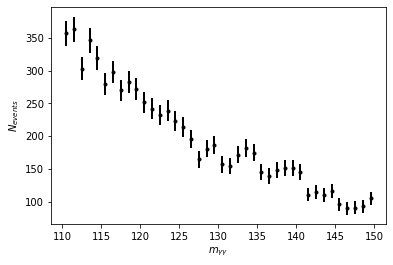

In [434]:
import csv

#Lets fit a bunch of polynomails with lmfit
x = []
y = []
y_err = []
label='out_2011.txt'
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=' ')
    for row in plots:
        if float(row[1]) > 150 or float(row[1]) < 110:
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        #add poisson uncertainties                                                                                                 
        y_err.append(np.sqrt(float(row[2])))

weights = np.linspace(0.,len(y),num=len(y))
for i0 in range(len(y)):
    weights[i0] = float(1./y_err[i0])

#Now we plot it. 
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0)
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.show()

Ok, this is a falling distribution, its not obvious what to fit this with. Lets just fit it with a bunch of polynomial functions, and see how it works. 

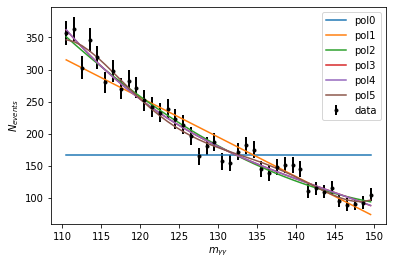

In [435]:
def pol0(x,p0):
    pols=[p0]
    y = np.polyval(pols,x)
    return y

def pol1(x,p0,p1):
    pols=[p0,p1]
    y = np.polyval(pols,x)
    return y

def pol2(x, p0, p1,p2):
    pols=[p0,p1,p2]
    y = np.polyval(pols,x)
    return y

def pol3(x, p0, p1,p2,p3):
    pols=[p0,p1,p2,p3]
    y = np.polyval(pols,x)
    return y

def pol4(x, p0, p1,p2,p3,p4):
    pols=[p0,p1,p2,p3,p4]
    y = np.polyval(pols,x)
    return y

def pol5(x, p0, p1,p2,p3,p4,p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

def fitModel(iX,iY,iWeights,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0)
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    #result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    output = model.eval(params=result.params,x=iX)
    return output

result0 = fitModel(x,y,weights,pol0)
result1 = fitModel(x,y,weights,pol1)
result2 = fitModel(x,y,weights,pol2)
result3 = fitModel(x,y,weights,pol3)
result4 = fitModel(x,y,weights,pol4)
result5 = fitModel(x,y,weights,pol5)

plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result0,label="pol0")
plt.plot(x,result1,label="pol1")
plt.plot(x,result2,label="pol2")
plt.plot(x,result3,label="pol3")
plt.plot(x,result4,label="pol4")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

#res0.plot()
#result1.plot()
#result2.plot()
#result3.plot()
#result4.plot()
#result5.plot()

Let's look at one of the higher order polynomials. 

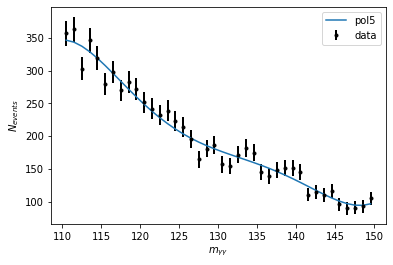

In [436]:
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result5,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

You can see its starting to pick up the fluctuations, if add even higher order polynomials, it will pick up even more fluctations. The f-test can tell us when we are adding too many polynomials. To see this, lets look at the residuals. 

Mean: 1.0861257446785584 	STD: 5.343399800440053
Mean: 0.057103092267087166 	STD: 1.4139559999956348
Mean: 0.03343373127646523 	STD: 0.9411203053614852


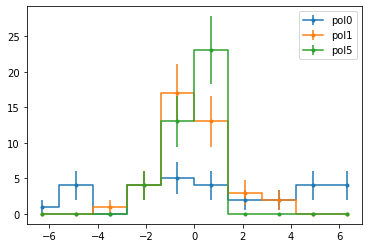

In [437]:
def residual(iY,iFunc,iYErr):
    resid = (iY-iFunc)/iYErr
    tmp_vals, tmp_bin_edges = np.histogram(resid, bins=10,range=[-7,7])
    tmp_bin_centers = 0.5*(tmp_bin_edges[1:] + tmp_bin_edges[:-1])
    print("Mean:",resid.mean(),"\tSTD:",resid.std())
    return tmp_bin_centers,tmp_vals

delta_p0,delta_y0 = residual(y,result0,y_err)
delta_p1,delta_y1 = residual(y,result1,y_err)
delta_p5,delta_y5 = residual(y,result5,y_err)
plt.errorbar(delta_p0,delta_y0,yerr=delta_y0**0.5,label="pol0",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p1,delta_y1,yerr=delta_y1**0.5,label="pol1",marker='.',drawstyle = 'steps-mid')
plt.errorbar(delta_p5,delta_y5,yerr=delta_y5**0.5,label="pol5",marker='.',drawstyle = 'steps-mid')
plt.legend()
plt.show()

So as we go to a higher order polynomial,we get to progressively smaller standard deviation. The issue is when do we stop. Lets now compute the f-statistic and compare it to our samples.  The f-statistic is defined at the ratio of the RMS distributions, we can write this as: 

\begin{equation}
 f = \frac{  \sigma^{2}_{\rm group} }{\sigma^{2}} \\
 \sigma^{2}_{\rm group} = \frac{ -\sum_{i=1}^{N} \left(y_{i}-f_{2}(x_{i})\right)^{2} + \sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}}{\Delta^{2\rightarrow 1}_{\rm dof}} \\
 \sigma^{2} = \frac{1}{N - n_{\rm f_{2}~dof} }\sum_{i=1}^{N} \left(y_{i}- f_{1}(x_{i})\right)^{2}
\end{equation}

or in other words the variation from a higher order polynomial to a lower order polynomial, should be smaller than the average variation of the residuals. This is the f-statistic. Let's compute the f-statistic for a few instances.

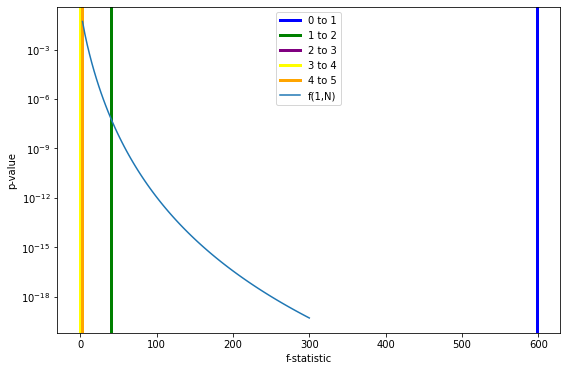

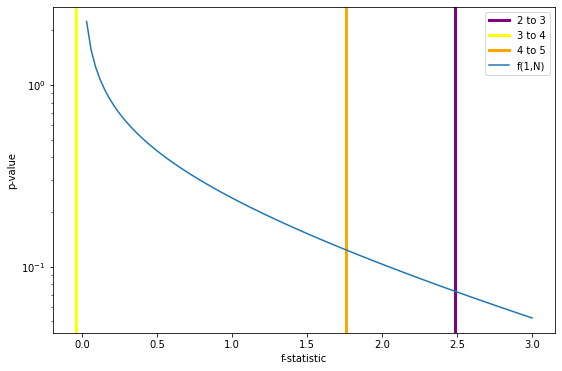

In [468]:
def residual2(iY,iFunc,iYErr):
    residval = (iY-iFunc)
    return np.sum(residval**2)
    
def ftest(iY,iYerr,f1,f2,ndof1,ndof2):
    r1=residual2(iY,f1,iYerr)
    r2=residual2(iY,f2,iYerr)
    sigma2group=(r1-r2)/(ndof2-ndof1)
    sigma2=r2/(len(y)-ndof2)
    return sigma2group/sigma2

f10=ftest(y,y_err,result0,result1,1,2)
f21=ftest(y,y_err,result1,result2,2,3)
f32=ftest(y,y_err,result2,result3,3,4)
f43=ftest(y,y_err,result3,result4,4,5)
f54=ftest(y,y_err,result4,result5,4,5)

xrange=np.linspace(0,300,100)
farr=stats.f.pdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))
ax.axvline(x=f10,linewidth=3,c='b',label='0 to 1')
ax.axvline(x=f21,linewidth=3,c='g',label='1 to 2')
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')
ax.set_yscale('log')
plt.plot(xrange,farr,label='f(1,N)')
plt.legend()
plt.xlabel('f-statistic')
plt.ylabel('p-value')
plt.show()

xrange=np.linspace(0,3,100)
farr=stats.f.pdf(xrange,1,len(y)-5) 
fig, ax = plt.subplots(figsize=(9,6))
ax.axvline(x=f32,linewidth=3,c='purple',label='2 to 3')
ax.axvline(x=f43,linewidth=3,c='yellow',label='3 to 4')
ax.axvline(x=f54,linewidth=3,c='orange',label='4 to 5')
ax.set_yscale('log')
plt.xlabel('f-statistic')
plt.plot(xrange,farr,label='f(1,N)')
plt.ylabel('p-value')
plt.legend()
plt.show()

So, we see that large probabilities are present already in the 2 to 3 transition, which means that we likely only need a 2nd order polynomial. Let's check the $\chi^{2}$ value as well. 

Mean: 0.04077706861139911 	STD: 1.038701227618278
Normalized chi2: 1.1681762265732507


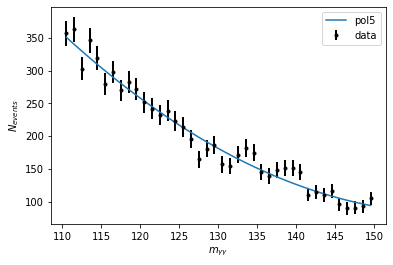

In [470]:
def chi2(iY,iFunc,iYErr,iNDOF):
    resid = (iY-iFunc)/iYErr
    chi2value = np.sum(resid**2)
    print("Mean:",resid.mean(),"\tSTD:",resid.std())
    return chi2value/(len(iY)-iNDOF)

chi2value=chi2(y,result2,y_err,3)
print("Normalized chi2:",chi2value)
plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
plt.plot(x,result2,label="pol5")
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("$N_{events}$")
plt.legend()
plt.show()

Overall, this show the signs of a good fit. 

### 8.9 Fitting for the Higgs boson signal Background

With all of these pieces together, I would like to compute the significance of the Higgs boson discovery in one of its main channels. To do this, we are going to use all of the tools that we have been going over. Let's first look at the data. For the Higgs boson data, there are 2 years of data each with 5 categories. Here is what all of them look like. 

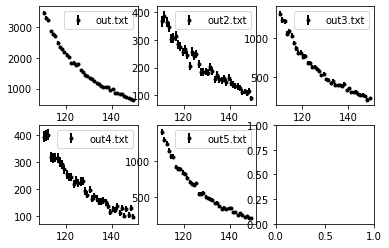

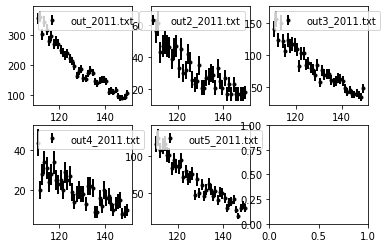

In [480]:
def load(iLabel):
    x = np.array([])
    y = np.array([])
    label=iLabel
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            if float(row[1]) > 150 or float(row[1]) < 110:
                continue
            x = np.append(x,float(row[1]))
            y = np.append(y,float(row[2]))
            #add poisson uncertainties                                                                                                 
    weights = 1./y**0.5 
    return x,y,y**0.5,weights

def plot(ax,iLabel):
    x,y,y_err,weights=load(iLabel)
    #Now we plot it. 
    ax.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label=iLabel)
    #ax.x_label("$m_{\gamma\gamma}$")
    #ax.y_label("$N_{events}$")
    ax.legend()
    #ax.show()
    
fig, axs = plt.subplots(2, 3)
#2012 data    
plot(axs[0,0],"out.txt")
plot(axs[0,1],"out2.txt")
plot(axs[0,2],"out3.txt")
plot(axs[1,0],"out4.txt")
plot(axs[1,1],"out5.txt")
plt.show()

fig, axs = plt.subplots(2, 3)
#2011 data    
plot(axs[0,0],"out_2011.txt")
plot(axs[0,1],"out2_2011.txt")
plot(axs[0,2],"out3_2011.txt")
plot(axs[1,0],"out4_2011.txt")
plot(axs[1,1],"out5_2011.txt")

As you can see, from the above plots, there are way more points in the 2012 data. Lets take the category with the largest number of points, and perform an f-test on it, we can neglect the signal for now, but we will get back to that in a sec.  

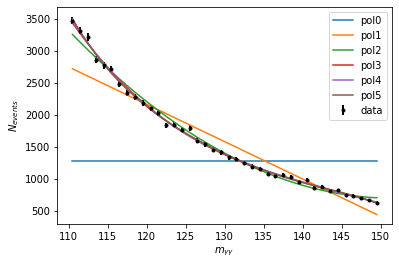

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 1.1102230246251565e-16
f 3 to 2: 1.6536771951791707e-10
f 4 to 3: 0.049202622083348135
f 5 to 4: 0.07569253451808633
out2 Test


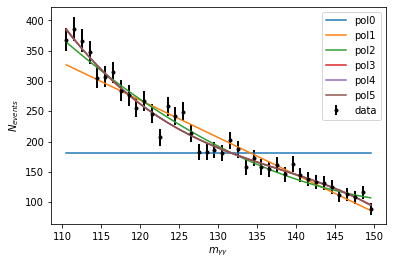

f 1 to 0: 1.1102230246251565e-16
f 2 to 1: 7.430483417447675e-08
f 3 to 2: 0.003628628692359692
f 4 to 3: 0.8546663212788914
f 5 to 4: 0.9746177621262444


In [487]:
def fitAll(iLabel,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    result0 = fitModel(x,y,weights,pol0)
    result1 = fitModel(x,y,weights,pol1)
    result2 = fitModel(x,y,weights,pol2)
    result3 = fitModel(x,y,weights,pol3)
    result4 = fitModel(x,y,weights,pol4)
    result5 = fitModel(x,y,weights,pol5)

    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,result0,label="pol0")
        plt.plot(x,result1,label="pol1")
        plt.plot(x,result2,label="pol2")
        plt.plot(x,result3,label="pol3")
        plt.plot(x,result4,label="pol4")
        plt.plot(x,result5,label="pol5")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return x,y,y_err,result0,result1,result2,result3,result4,result5

def ftestAll(iLabel):
    x,y,y_err,result0,result1,result2,result3,result4,result5=fitAll(iLabel)
    f10=ftest(y,y_err,result0,result1,1,2)
    f21=ftest(y,y_err,result1,result2,2,3)
    f32=ftest(y,y_err,result2,result3,3,4)
    f43=ftest(y,y_err,result3,result4,4,5)
    f54=ftest(y,y_err,result4,result5,4,5)
    print("f 1 to 0:",1-stats.f.cdf(f10,1,len(y)-5))
    print("f 2 to 1:",1-stats.f.cdf(f21,1,len(y)-5))
    print("f 3 to 2:",1-stats.f.cdf(f32,1,len(y)-5))
    print("f 4 to 3:",1-stats.f.cdf(f43,1,len(y)-5))
    print("f 5 to 4:",1-stats.f.cdf(f54,1,len(y)-5))
    
fitAll("out.txt",True)
ftestAll("out.txt")

print("out2 Test")
fitAll("out2.txt",True)
ftestAll("out2.txt")

So from this looks like a 4th order polynomialgives an f-test above roughly 5% for both the category with the largest yield and the second largest yield. This seems reaonsable for us to use as our background function. Let's proceed with a signal function. 

## 8.10 Fitting a Higgs Signal

Now, to fit a Higgs signal, what we want to do is a hypothesis test like we did above. Except now, we will cast our hypothesis, slightly differently to before. 

**Null Hypothesis** The Higgs signal has a mass of $m_{\gamma\gamma}$ at a specific $m_{0}$, and a fixed width 2~GeV. 

**Alternative Hypothesis** The Higgs signal is not there. 

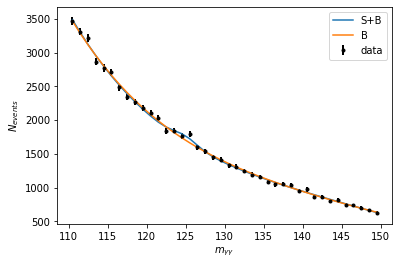

NLL: 7.4770840123018525 p-value 0.006248919300104849


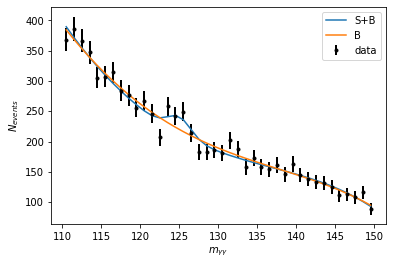

NLL: 5.687807014188694 p-value 0.017083190039783203


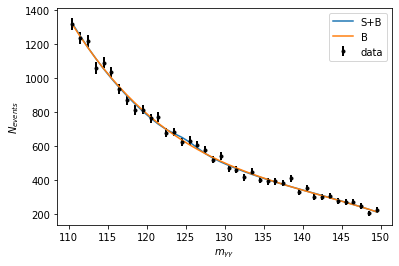

NLL: 1.4853624676365678 p-value 0.2229373955933538


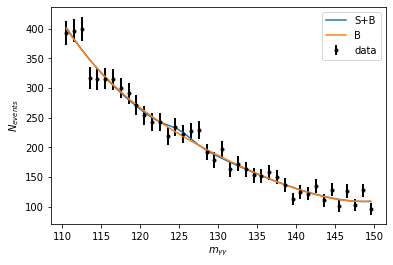

NLL: 0.7273481495426217 p-value 0.3937441092316898


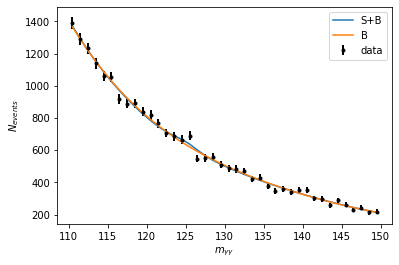

NLL: 1.696617022911917 p-value 0.19273099165965168


In [538]:
def sigpol4(x,p0,p1,p2,p3,p4,amp,mass,sigma):
    bkg=pol4(x,p0,p1,p2,p3,p4)
    sig=amp*stats.norm.pdf(x,mass,sigma)
    return sig+bkg

def fitModel(iX,iY,iWeights,iM,iFunc):
    model  = lmfit.Model(iFunc)
    p = model.make_params(p0=0,p1=0,p2=0,p3=0,p4=0,p5=0,amp=0,mass=iM,sigma=1.5)
    try:
        p["mass"].vary=False
        p["sigma"].vary=False
    except:
      a=1
      #print("Mass and Sigma not in fit")
    result = model.fit(data=iY,params=p,x=iX,weights=iWeights)
    output = model.eval(params=result.params,x=iX)
    return output,result.residual

def fitSig(iLabel,iM,iPlot=False):
    x,y,y_err,weights=load(iLabel)
    resultSB,likeSB=fitModel(x,y,weights,iM,sigpol4)
    resultB, likeB =fitModel(x,y,weights,iM,pol4)
    if iPlot:
        plt.errorbar(x,y,y_err, lw=2,fmt=".k", capsize=0,label="data")
        plt.plot(x,resultSB,label="S+B")
        plt.plot(x,resultB, label="B")
        plt.xlabel("$m_{\gamma\gamma}$")
        plt.ylabel("$N_{events}$")
        plt.legend()
        plt.show()
    return np.sum(likeB**2-likeSB**2)

NLL=fitSig("out.txt",125,True)
print("NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out2.txt",125,True)
print("NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out3.txt",125,True)
print("NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out4.txt",125,True)
print("NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

NLL=fitSig("out5.txt",125,True)
print("NLL:",NLL,"p-value",1-stats.chi2.cdf(NLL,1))

Wow, we see a fairly significant Higgs bump at 125, but lets scan the mass and make the so called p-value plot. This is just a plot of the significance as a function of mass. 

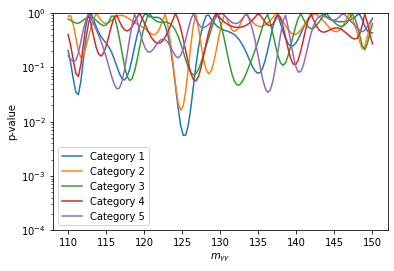

In [539]:
def pvaluePlot(iLabel):
    pvalue = np.array([])
    massrange=np.linspace(110,150,120)
    for pMass in massrange:
        NLL=fitSig(iLabel,pMass,False)
        NLLp = 1-stats.chi2.cdf(NLL,1)
        pvalue = np.append(pvalue,NLLp)
    return massrange,pvalue

m0,p0 = pvaluePlot("out.txt")
m1,p1 = pvaluePlot("out2.txt")
m2,p2 = pvaluePlot("out3.txt")
m3,p3 = pvaluePlot("out4.txt")
m4,p4 = pvaluePlot("out5.txt")

plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()

## 8.11 Combining p-values

Now, if we have 5 expeirments each giving a p-value at a specific mass point. How, do we combine these p-values. The strategy is to realize these are each independent experiments. Moreover, it can be shown that if you have a flat prior in probability, and if you take the log of this prior and multiply by 2 $2\log(p)$ this distribution is approximately that of a $\chi^{2}$ distribution of 2 degrees of freedom. Let's check this. 


and so we can sum their $\chi^{2}$ values and treat this as a $\chi^{2}$ with $n$-categories degrees of freedom. Let's combine them. 

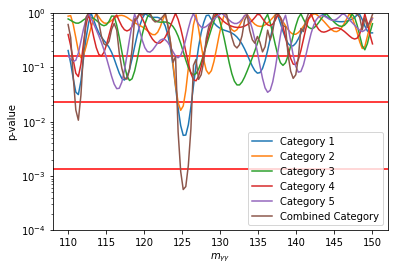

In [557]:
def pvalueCombinedPlot(iLabels):
    pvalue = np.array([])
    massrange=np.linspace(110,150,120)
    for pMass in massrange:
        NLLtot=0
        for pLabel in iLabels:
            NLL=fitSig(pLabel,pMass,False)
            NLLp = stats.chi2.pdf(NLL,1)
            #print(NLL,NLLp,-2*np.log(NLLp))
            NLLtot = NLLtot - 2.*np.log(NLLp)
            #NLLtot = NLLtot + NLL
        pPVal  = 1-stats.chi2.cdf(NLLtot,2*len(iLabels))
        #print(pPVal,NLLtot)
        pvalue = np.append(pvalue,pPVal)
    return massrange,pvalue

files=["out.txt","out2.txt","out3.txt","out4.txt","out5.txt"]
mC,pC = pvalueCombinedPlot(files)

for pVal in range(4):
    sigmas = 1-norm.cdf(pVal+1)
    plt.axhline(y=sigmas, color='r', linestyle='-')
plt.plot(m0,p0,label="Category 1")
plt.plot(m1,p1,label="Category 2")
plt.plot(m2,p2,label="Category 3")
plt.plot(m3,p3,label="Category 4")
plt.plot(m4,p4,label="Category 5")
plt.plot(mC,pC,label="Combined Category")
plt.ylim((0.0001,1))
plt.xlabel("$m_{\gamma\gamma}$")
plt.ylabel("p-value")
plt.yscale("log")
plt.legend()
plt.show()


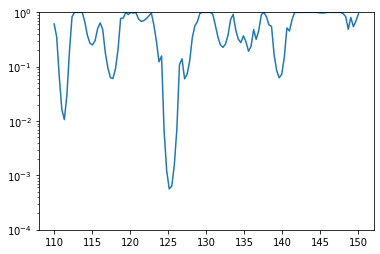

In [560]:
plt.plot(mC,pC,label="Category 1")
plt.ylim((0.0001,1))
plt.yscale("log")